# SPEED DATING with Tinder


This project is for [JEDHA](https://www.jedha.co/) Data Science Full-Stack Bootcamp.

See the word document for more detailed description of events and each variable.

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

### Importing the dataset

In [2]:
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
df = pd.read_csv("Speed+Dating+Data.csv")

In [3]:
df.head()

iid   id  gender  idg  condtn  wave  round  position  positin1  order  \
0    1  1.0       0    1       1     1     10         7       NaN      4   
1    1  1.0       0    1       1     1     10         7       NaN      3   
2    1  1.0       0    1       1     1     10         7       NaN     10   
3    1  1.0       0    1       1     1     10         7       NaN      5   
4    1  1.0       0    1       1     1     10         7       NaN      7   

   partner   pid  match  int_corr  samerace  age_o  race_o  pf_o_att  \
0        1  11.0      0      0.14         0   27.0     2.0      35.0   
1        2  12.0      0      0.54         0   22.0     2.0      60.0   
2        3  13.0      1      0.16         1   22.0     4.0      19.0   
3        4  14.0      1      0.61         0   23.0     2.0      30.0   
4        5  15.0      1      0.21         0   24.0     3.0      30.0   

   pf_o_sin  pf_o_int  pf_o_fun  pf_o_amb  pf_o_sha  dec_o  attr_o  sinc_o  \
0      20.0      20.0      20.0       0.0       5.0      0     6.0     8.0   
1       0.0       0.0      40.0       0.0       0.0      0     7.0     8.0   
2      18.0      19.0      18.0      14.0      12.0      1    10.0    10.0   
3       5.0      15.0      40.0       5.0       5.0      1     7.0     8.0   
4      10.0      20.0      10.0      10.0      20.0      1     8.0     7.0   

   intel_o  fun_o  amb_o  shar_o  like_o  prob_o  met_o   age field  field_cd  \
0      8.0    8.0    8.0     6.0     7.0     4.0    2.0  21.0   Law       1.0   
1     10.0    7.0    7.0     5.0     8.0     4.0    2.0  21.0   Law       1.0   
2     10.0   10.0   10.0    10.0    10.0    10.0    1.0  21.0   Law       1.0   
3      9.0    8.0    9.0     8.0     7.0     7.0    2.0  21.0   Law       1.0   
4      9.0    6.0    9.0     7.0     8.0     6.0    2.0  21.0   Law       1.0   

  undergra mn_sat tuition  race  imprace  imprelig     from zipcode  \
0      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   
1      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   
2      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   
3      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   
4      NaN    NaN     NaN   4.0      2.0       4.0  Chicago  60,521   

      income  goal  date  go_out  career  career_c  sports  tvsports  \
0  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
1  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
2  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
3  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   
4  69,487.00   2.0   7.0     1.0  lawyer       NaN     9.0       2.0   

   exercise  dining  museums  art  hiking  gaming  clubbing  reading   tv  \
0       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
1       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
2       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
3       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   
4       8.0     9.0      1.0  1.0     5.0     1.0       5.0      6.0  9.0   

   theater  movies  concerts  music  shopping  yoga  exphappy  expnum  \
0      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
1      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
2      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
3      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   
4      1.0    10.0      10.0    9.0       8.0   1.0       3.0     2.0   

   attr1_1  sinc1_1  intel1_1  fun1_1  amb1_1  shar1_1  attr4_1  sinc4_1  \
0     15.0     20.0      20.0    15.0    15.0     15.0      NaN      NaN   
1     15.0     20.0      20.0    15.0    15.0     15.0      NaN      NaN   
2     15.0     20.0      20.0    15.0    15.0     15.0      NaN      NaN   
3     15.0     20.0      20.0    15.0    15.0     15.0      NaN      NaN   
4     15.0     

In [4]:
print("Number of columns is", df.shape[1])
print("Number of observations in the dataset is", df.shape[0])

Number of columns is 195
Number of observations in the dataset is 8378


 However, a quick insight on the dataset description shows that 8378 is not the actual number of speed dates, as each date in a wave was registered twice, from the point of view of each partner. Hence;

In [5]:
print("The total number of speed dates happened:", int(df.shape[0] / 2))

The total number of speed dates happened: 4189


In [6]:
print("Total number of participants is", df['iid'].max())

Total number of participants is 552


In [7]:
df.describe()

iid           id       gender          idg       condtn  \
count  8378.000000  8377.000000  8378.000000  8378.000000  8378.000000   
mean    283.675937     8.960248     0.500597    17.327166     1.828837   
std     158.583367     5.491329     0.500029    10.940735     0.376673   
min       1.000000     1.000000     0.000000     1.000000     1.000000   
25%     154.000000     4.000000     0.000000     8.000000     2.000000   
50%     281.000000     8.000000     1.000000    16.000000     2.000000   
75%     407.000000    13.000000     1.000000    26.000000     2.000000   
max     552.000000    22.000000     1.000000    44.000000     2.000000   

              wave        round     position     positin1        order  \
count  8378.000000  8378.000000  8378.000000  6532.000000  8378.000000   
mean     11.350919    16.872046     9.042731     9.295775     8.927668   
std       5.995903     4.358458     5.514939     5.650199     5.477009   
min       1.000000     5.000000     1.000000     1.000000     1.000000   
25%       7.000000    14.000000     4.000000     4.000000     4.000000   
50%      11.000000    18.000000     8.000000     9.000000     8.000000   
75%      15.000000    20.000000    13.000000    14.000000    13.000000   
max      21.000000    22.000000    22.000000    22.000000    22.000000   

           partner          pid        match     int_corr     samerace  \
count  8378.000000  8368.000000  8378.000000  8220.000000  8378.000000   
mean      8.963595   283.863767     0.164717     0.196010     0.395799   
std       5.491068   158.584899     0.370947     0.303539     0.489051   
min       1.000000     1.000000     0.000000    -0.830000     0.000000   
25%       4.000000   154.000000     0.000000    -0.020000     0.000000   
50%       8.000000   281.000000     0.000000     0.210000     0.000000   
75%      13.000000   408.000000     0.000000     0.430000     1.000000   
max      22.000000   552.000000     1.000000     0.910000     1.000000   

             age_o       race_o     pf_o_att     pf_o_sin     pf_o_int  \
count  8274.000000  8305.000000  8289.000000  8289.000000  8289.000000   
mean     26.364999     2.756653    22.495347    17.396867    20.270759   
std       3.563648     1.230689    12.569802     7.044003     6.782895   
min      18.000000     1.000000     0.000000     0.000000     0.000000   
25%      24.000000     2.000000    15.000000    15.000000    17.390000   
50%      26.000000     2.000000    20.000000    18.370000    20.000000   
75%      28.000000     4.000000    25.000000    20.000000    23.810000   
max      55.000000     6.000000   100.000000    60.000000    50.000000   

          pf_o_fun     pf_o_amb     pf_o_sha        dec_o       attr_o  \
count  8280.000000  8271.000000  8249.000000  8378.000000  8166.000000   
mean     17.459714    10.685375    11.845930     0.419551     6.190411   
std       6.085526     6.126544     6.362746     0.493515     1.950305   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      15.000000     5.000000     9.520000     0.000000     5.000000   
50%      18.000000    10.000000    10.640000     0.000000     6.000000   
75%      20.000000    15.000000    16.000000     1.000000     8.000000   
max      50.000000    53.000000    30.000000     1.000000    10.500000   

            sinc_o      intel_o        fun_o        amb_o       shar_o  \
count  8091.000000  8072.000000  8018.000000  7656.000000  7302.000000   
mean      7.175256     7.369301     6.400599     6.778409     5.474870   
std       1.740575     1.550501     1.954078     1.794080     2.156163   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       6.000000     6.000000     5.000000     6.000000     4.000000   
50%       7.000000     7.000000     7.000000     7.000000     6.000000   
75%       8.000000     8.000000     8.000000     8.000000     7.000000   
max      10.000000    10.000000    11.000000    10.000000    10.000000   

            l

### Missing Data

In [8]:
print("Number of missing values:")
display(df.isnull().sum())

Number of missing values:


iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

## PART 1: GETTING TO KNOW THE PARTICIPANTS
### 1.1 Demographic and socioeconomic backgrounds

Let's first map gender and race codes back to corresponding labels

- Black/African American=1
- European/Caucasian-American=2
- Latino/Hispanic American=3
- Asian/Pacific Islander/Asian-American=4
- Native American=5
- Other=6


In [9]:
gender_map = {0: "women", 1: "men"}
race_map = {1: "Black/African", 2: "European/Caucasian-American", 3: "Latino/Hispanic", 
            4: "Asian/Asian-American", 5: "NativeAmerican", 6: "Other"}

df['gender_decoded'] = df["gender"].map(gender_map)
df['race_decoded'] = df["race"].map(race_map)

In [10]:
demo_features = ["gender", "age", "race", "income"]
# Remove commas and convert 'income' column to numeric
df['income'] = df['income'].replace(',', '', regex=True).astype(float)

demo_df = df.groupby("iid")[demo_features].mean().astype('Int64', errors = 'ignore')
#demo_df = demo_df.reset_index()
#demo_df['age'] = pd.to_numeric(demo_df['age'], errors = 'ignore').astype('Int64', errors = 'ignore')
demo_df['gender'] = demo_df["gender"].map(gender_map)
demo_df['race'] = demo_df["race"].map(race_map)

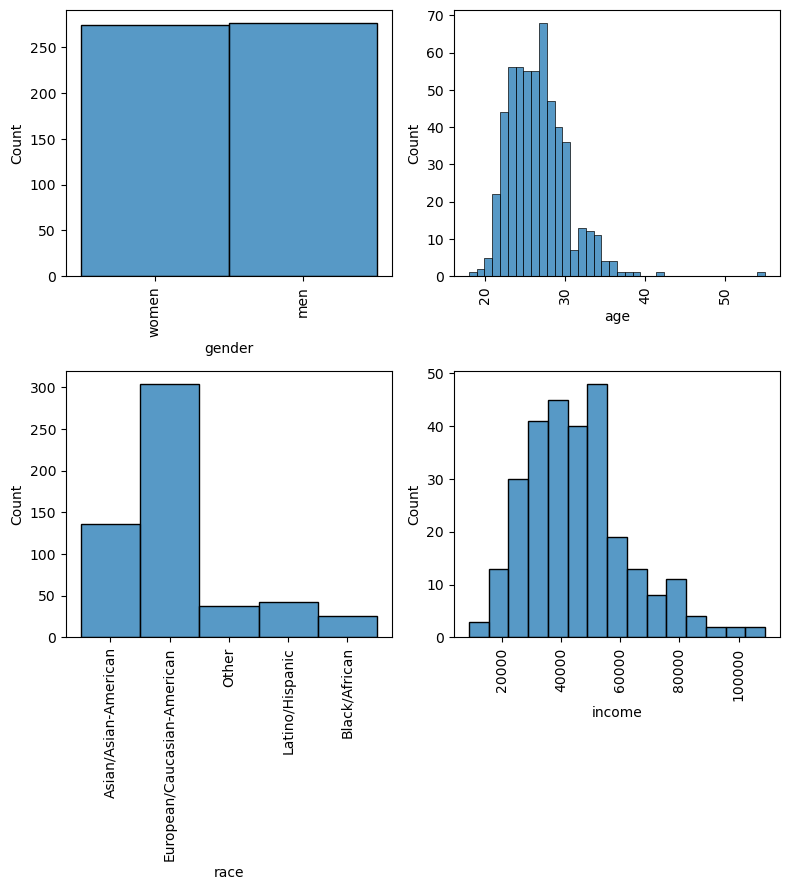

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(8, 9))  # Creating subplots with 1 row and 2 columns
axes = axes.flatten()


for i, column in enumerate(demo_df.columns):
    sns.histplot(x=column, data=demo_df, ax=axes[i], stat="count") 
    axes[i].tick_params(axis='x', labelrotation=90)  # Adjust rotation angle as needed


# Adjust layout
plt.tight_layout()
plt.show()

- Reading the word document, it seems like the dates only happened between different-sex couples. Therefore, the number of male and female participants is almost equal as one might expect.
- The majority of participants are aged between 20 and 30.
- The participants are overwhelmingly from a European/Caucasian or American background, followed by Asian or Asian-Americans.
- The average income is around 45,000usd.

### 1.2 Education and Career Goals

In [12]:
edu_features = ['field_cd', 'career_c']
edu_map = {1:"Law",  
           2:"Math",
           3:"Social Science, Psychologist",
           4:"Medical Science, Pharmaceuticals, and Bio Tech",
           5:"Engineering",  
           6: "English/Creative Writing/ Journalism",
           7:"History/Religion/Philosophy", 
           8:"Business/Econ/Finance",
           9: "Education, Academia" ,
           10: "Biological Sciences/Chemistry/Physics",
           11: "Social Work" ,
           12: "Undergrad/undecided" ,
           13:"Political Science/International Affairs" ,
           14:"Film",
           15:"Fine Arts/Arts Administration",
           16:"Languages",
           17:"Architecture",
           18:"Other"
          }

career_map = {
    1: "Lawyer", 
    2: "Academic/Research",
    3: "Psychologist", 
    4: "Doctor/Medicine", 
    5:"Engineer", 
    6: "Creative Arts/Entertainment", 
    7: "Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin", 
    8: "Real Estate",
    9: "International/Humanitarian Affairs",
    10: "Undecided",
    11:"Social Work",
    12:"Speech Pathology",
    13:"Politics",
    14:"Pro sports/Athletics",
    15:"Other",
    16:"Journalism",
    17:"Architecture"
}

df_educ = df.groupby('iid')[edu_features].mean().astype('Int64', errors = 'ignore')

df_educ['field_cd'] = df_educ["field_cd"].map(edu_map)
df_educ['career_c'] = df_educ["career_c"].map(career_map)


In [13]:
df_educ = pd.DataFrame(df_educ)

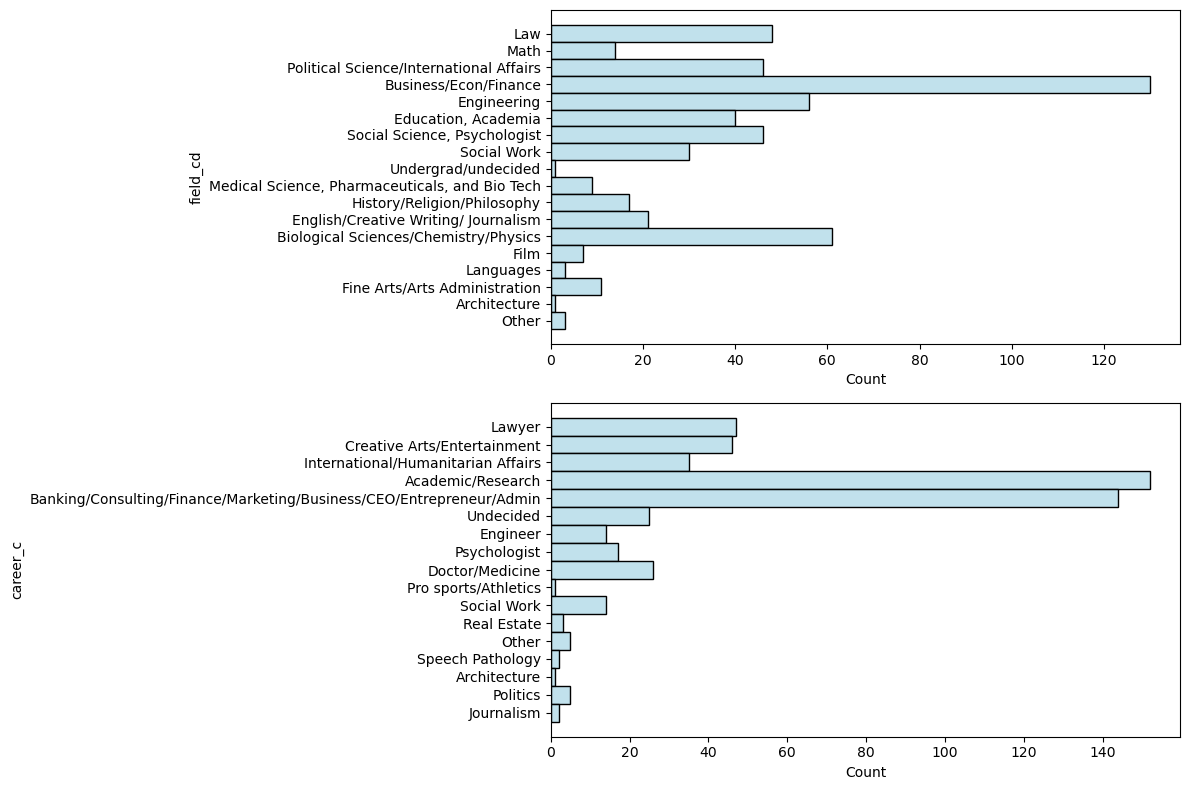

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8))  # Creating subplots with 1 row and 2 columns
axes = axes.flatten()



for i, column in enumerate(df_educ.columns):
    sns.histplot(y=column, data=df_educ, ax=axes[i], stat="count", color = "lightblue") 


# Adjust layout
plt.tight_layout()
plt.show()

### 1.3 Hobbies and Interests

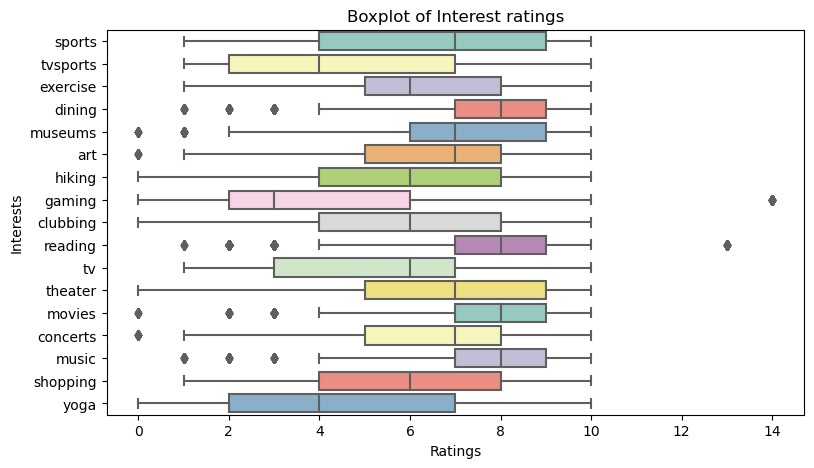

In [15]:
interests = [
    'sports',
    'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga']

plt.figure(figsize=(9, 5))
sns.boxplot(data=df[interests], palette='Set3', orient='h')
plt.xlabel('Ratings')
plt.ylabel('Interests')
plt.title('Boxplot of Interest ratings')
plt.show()

- Gaming seems to be the least popular hobby among our participants, while music, reading and dining have all obtained a high score and small variation.
- The participant rankings for yoga, sports and tv sports show a lot of variation.

### 1.4 Expectations from the Event

In [16]:
goal_map = {
    1:"Seemed like a fun night out",
    2:"To meet new people",
    3:"To get a date",
    4:"Looking for a serious relationship",
    5:"To say I did it",
    6:"Other"

}

goals = df.groupby("iid")['goal'].mean().astype('Int64', errors = 'ignore').map(goal_map)

In [17]:
demo_df['goals']=goals

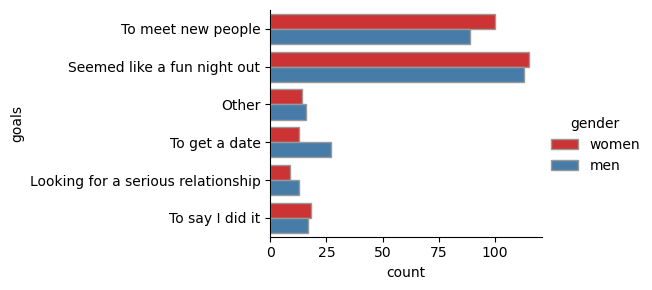

In [18]:
sns.catplot(
    data=demo_df, y="goals", hue="gender", kind="count",
    palette="Set1", edgecolor=".6",
    height=3,  
    aspect=2
)

- According to this plot, most partipants joined the event either because it seemed like a fun night out or to meet some new people.
- The number of participants who joined in order to find a serious relationship is low, even lower among women then men.

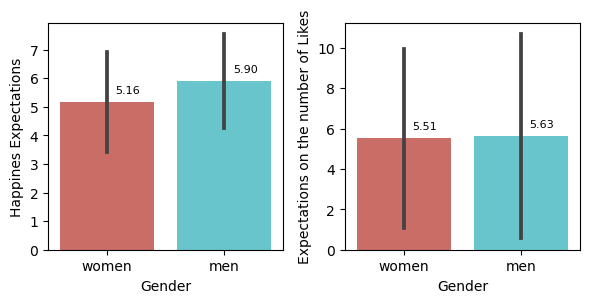

In [19]:
df['Happines Expectations'] = df['exphappy'] #.astype('int64',errors= 'ignore')
df['Expectations on the number of Likes'] = df['expnum'] #.astype('int64',errors= 'ignore')

expectations = ['Happines Expectations', 'Expectations on the number of Likes']


plt.figure(figsize=(6, 3))

for i, expectation in enumerate(expectations, start=1):
    plt.subplot(1, 2, i)
    ax = sns.barplot(
        x='gender_decoded', y=expectation, data=df, ci='sd', palette='hls'
    )
    plt.xlabel('Gender')
    plt.ylabel(expectation)


    # Add values on top of the bars
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():.2f}',
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center',
            va='bottom',
            fontsize=8,
            color='black',
            xytext=(15, 5),
            textcoords='offset points',
        )

plt.tight_layout()
plt.show()

- In terms of what they expect from the event, men seem more optimistic than women both in their happiness expectations and the number of likes they whought they would receive but the averages are quite close.

### 1.5 Preferences over attributes

- When asked to report their preferences over six attributes (attractiveness, sincerity, intelligence, fun, ambition, and shared interest), the partipants received two different instructions on the way they should rate the attributes. (see word document)
- The waves 6,7,8,9 were asked to rate each of these attirbutes on a scale from 0 to 10 independently whereas the rest of the ways was asked to distribute 100 points the way they want over these 6 attributes.
- One option is to omit the waves 6,7,8,9 and focus on the rest to evaluate the average preference score for each attribute. Another option is to try to standardize this different rating strategies so that we could use informations from all 22 waves.
- I pursued the following strategies to convert the ratings from waves 6,7,8,9 to a scale of 100 points:

In [20]:
waves = [6,7,8,9]
preferences = [col for col in df.columns if col.startswith('pf')]
## for conversion of attributes, I will divide each attribute's rating to the sum of all attribute ratings a person 
# gave and multiply it by 100.
for i in range(len(df)):
    if df['wave'][i] in waves:
        if df.loc[i,preferences].isnull().sum()== 0:
            sum_preferences = df.loc[i, preferences].sum()
            for j in preferences:
                df.iloc[i, df.columns.get_loc(j)] = df[j][i] / sum_preferences * 100

                       
        

<AxesSubplot:>

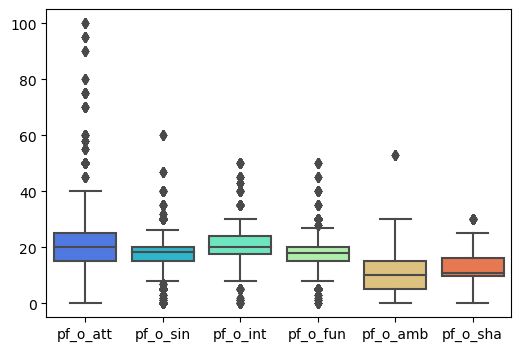

In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df[preferences],palette='rainbow')

- The attibutes that receive in average the highest share over 100 points seems to be intelligence, which is tightly followed by attractiveness. 
- The attirbute that receives the lowest average score is ambition.

#### Now let's find out how this ratings change between male and female participants to see which attributes were most desirable for each gender.

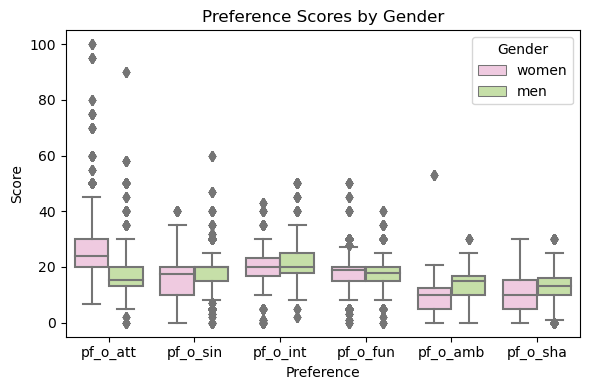

In [22]:
df_preferences = df[['gender_decoded'] + preferences]

# Melt the dataframe to have preferences as a single column
melted_df = pd.melt(df_preferences, id_vars='gender_decoded', value_vars=preferences, var_name='Preference', value_name='Count')

# Plotting boxplot with hue as gender
plt.figure(figsize=(6, 4))  # Set figure size

sns.boxplot(data=melted_df, x='Preference', y='Count', hue='gender_decoded', palette='PiYG')

plt.xlabel('Preference')
plt.ylabel('Score')
plt.title('Preference Scores by Gender')
plt.legend(title='Gender')

plt.tight_layout()
plt.show()

- Looking at the above figure, we can see the average preference differences between male and female participants.
- Attractiveness appears as the most important attribute in average for women, whereas men reported to value it relatively less in comparison. Actually attractiveness is one of the two attributes that got the lowest average score score from men, the other being shared interest.
- The most important attibute among men on the other hand was reported as intelligence, which was also very highly scored by women. 
- Men clearly attached a higher importance to ambition than women do, in fact it is the attribute which received the lowest average score from women. 

### 1.6 Preferences over Shared Racial / Religious Backgrounds

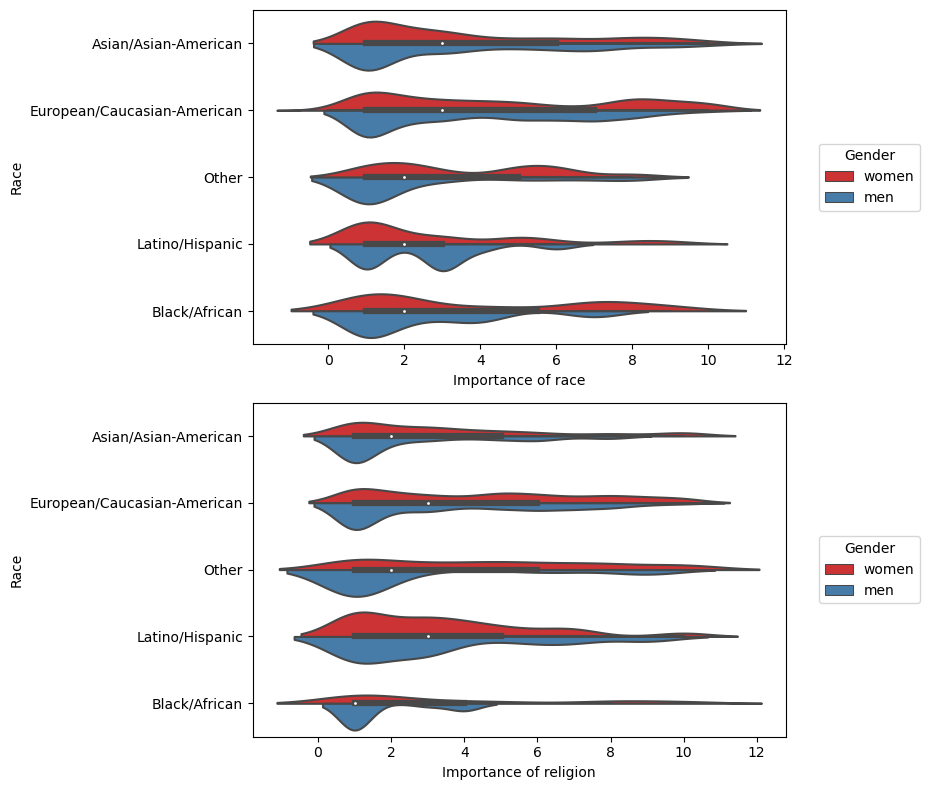

In [23]:
ethnoracial = {'imprace':'race', 'imprelig':'religion'}

fig, axes = plt.subplots(2, 1, figsize=(9.5, 8))  # Creating subplots with 1 row and 2 columns
axes = axes.flatten()

for i, column in enumerate(df[ethnoracial.keys()].columns):
    sns.violinplot(y="race_decoded",  x=column, data=df,
                   hue = 'gender_decoded',split=True,palette='Set1',ax = axes[i])
    
    axes[i].legend(title='Gender', bbox_to_anchor=(1.05, 0.5), loc='center left')
    axes[i].set_xlabel(f"Importance of {ethnoracial[column]}")  
    axes[i].set_ylabel("Race")  



plt.tight_layout()
plt.legend(title='Gender', bbox_to_anchor=(1.05, 0.5), loc='center left')  # Place legend outside the subplots

plt.show()

- The partipants in average do not seem to score highly neither race nor religion, yet the scores show some variations depending on the gender and racial background.
- European-Caucassian, American, Asian or Asian-American participants attribute in average a higher importance to shared racial background compared to other participants.
- In general, women seem to value the shared racial background more than men do, with European-Caucassian or American women being the group that assigned the highest average score to this feature.
- When it comes to religion, Latino-Hispanic originated people assigned a higher score to it than they did for shared racial background. They are one of the two racial groups that valued this feature most, the other being again European/Caucasian-American participants.
- Once again, women seem to attach higher importance to having same religion compared to men.
- The group who attached the lowest significance to this attribute is Black-African backgrounds.

## PART 2: EVENT OUTCOMES
The next section explores the decisions participants made during the event night.
In particular I will examine:
- the attributes that are more correlated with the decision to meet that person again,
- the distribution of determining factors across different genders and races,
- the differences between self-reported and observed importances assigned to each attribute,
- the potential impact of date orders in the decision to see the person again,
- the differences between expected and real outcomes from the dates.

In [25]:
df['match']= df['match'].astype(int)
print("The total number of matches:", int(df['match'].sum()/2))
print("The percentage of yes decisions:", round(100*df['dec'].sum()/ int(df.shape[0]),2), "%")
print("The percentage of dates that ended up as a match:", round(100*df['match'].sum() / int(df.shape[0]),2),"%")


The total number of matches: 690
The percentage of yes decisions: 41.99 %
The percentage of dates that ended up as a match: 16.47 %


In [26]:
df['match'] = df['match'].astype(str)

df_n = df.groupby('wave')['match'].value_counts(normalize=True) * 100
df_n = df_n.rename('percent').reset_index()

# Create the grouped bar chart with percentages
fig = px.bar(df_n, x='wave', y='percent', color='match', barmode='group',
             text='percent', labels={'percent': 'Percentage'}, title='Percentage of Matches per Wave',
             category_orders={'match': ['Yes', 'No']})
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(xaxis_title='Wave', yaxis_title='Percentage', height=400, width=600)
fig.show()

Let's see how the percentage of 'yes' (want to meet again) decisions was distributed accross the waves and whether or not this percentage was affected by the number of people who participatde to the night.

In [27]:
df['dec'] = df['dec'].astype(str)
df['wave'] = df['wave'].astype(str)
sorted_waves = df.groupby('wave')['round'].mean().sort_values().index

# Convert 'wave' to categorical variable using the sorted order
df['wave'] = pd.Categorical(df['wave'], categories=sorted_waves, ordered=True)

df_n = df.groupby('wave')['dec'].value_counts(normalize=True) * 100
df_n = df_n.rename('percent').reset_index()

# Create the grouped bar chart with percentages
fig = px.bar(df_n, x='wave', y='percent', color='dec', barmode='group',
             text='percent', labels={'percent': 'Percentage'}, title='Percentage of Yes Decisions per Wave',
             category_orders={'dec': ['Yes', 'No']})
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(xaxis_title='Wave', yaxis_title='Percentage', height=400, width=600)
fig.show()

In the figure above, the waves were ranked by the number of participants in an ascending order, with Wave6 having the lowest number of participants and Wave21 having the highest.
- Looking at the graph, we see some serious variations in the percentage of yes decisions per wave.
- Wave1 achieved the highest percentage of yes decisions (55%) and Wave3 had the lowest share of 'yes' response (33.5%)
- However, it is hard to find a correlation between the number of participants and the number of positive replies.

## Then, which factors seem to have guided the decisions?

### 2.1 Propensity to Say Yes per Gender

In [28]:
df['dec'] = df['dec'].astype(str)

df_n = df.groupby('gender_decoded')['dec'].value_counts(normalize=True) * 100
df_n = df_n.rename('percent').reset_index()

# Create the grouped bar chart with percentages
fig = px.bar(df_n, x='gender_decoded', y='percent', color='dec', barmode='group',
             text='percent', labels={'percent': 'Percentage'}, title='Percentage of Decisions per Gender',
             category_orders={'dec': ['Yes', 'No']}, height = 500, width=450)
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(xaxis_title='Gender', yaxis_title='Percentage')
fig.show()


It looks like men gave in average nearly 11% more people a positive response compared to women.

### 2.2 Correlation Matrix for attributes, shared interests and racial background

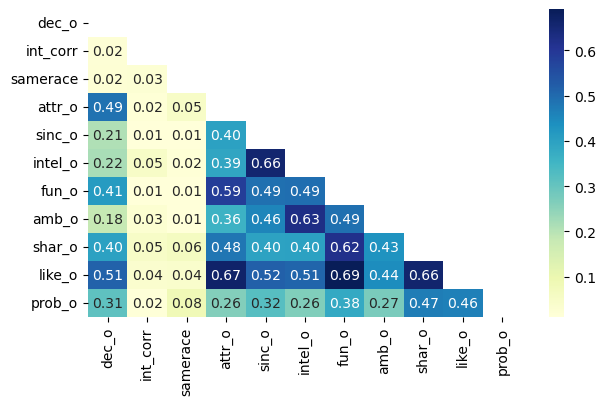

In [29]:
df_corr = df[['dec_o', 'int_corr', 'samerace', 'attr_o','sinc_o', 'intel_o', 'fun_o',
              'amb_o', 'shar_o', 'like_o', 'prob_o']]
corr_matrix = df_corr.corr()
plt.figure(figsize=(7, 4))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", mask = mask)
plt.show()


#### Likes do not always mean yes for a next date!
- As we may expect, the factor that correlates most with the decision is whether they liked the partner or not. Interestingly, even this variable does not show a perfect correlation, with participants saying yes to only 46% of the partners they like. This may actually indicate several things. People can have liked the partner as a person, or in a friendly way but not as a romantic partner. Or, they may have joined the night as a one time thing without seeking anything further than that.

#### Intelligence mattered less than reported
- Attractiveness is the factor that displays the highest correlation with the positive decision.
- Interestingly, intelligence, which was reported in average as the most important attribute played a much smaller role. 
- Another interesting thing is that finding the other person as 'fun' is the most correlated attribute (69%) with whether they liked that person or not, however, it is in the third place for the correlation with the yes decision.
- Having same racial background does neither seem to impact the final decision much.

#### People may not have the best judgment on their shared interests
- However, while the actual correlation between their reported interest-ratings did not play much role in their decision to see the other person again, their personal assessment on whether they have shared interests / hobbies does seem to play a role ! (0.40 correlation) Again is an interesting finding. So the people seem to value the presence of common interest in their decisions, however, there is a discrepancy between their perception and real degree of compliance of interest. Are the partners lying about their interest during the dates? Or do partners make wrong assumptions about each other?
- What is even more striking is that there is only 0.05 correlation between partner's perception of shared interests (shar_o) and real correlation of their previously reported interests (int_corr) ! 


Let's explore further those correlations for men and women separately. I will start by creating a variable "gender_o" which denotes the gender of the partner who evaluates attributes and gives the decision

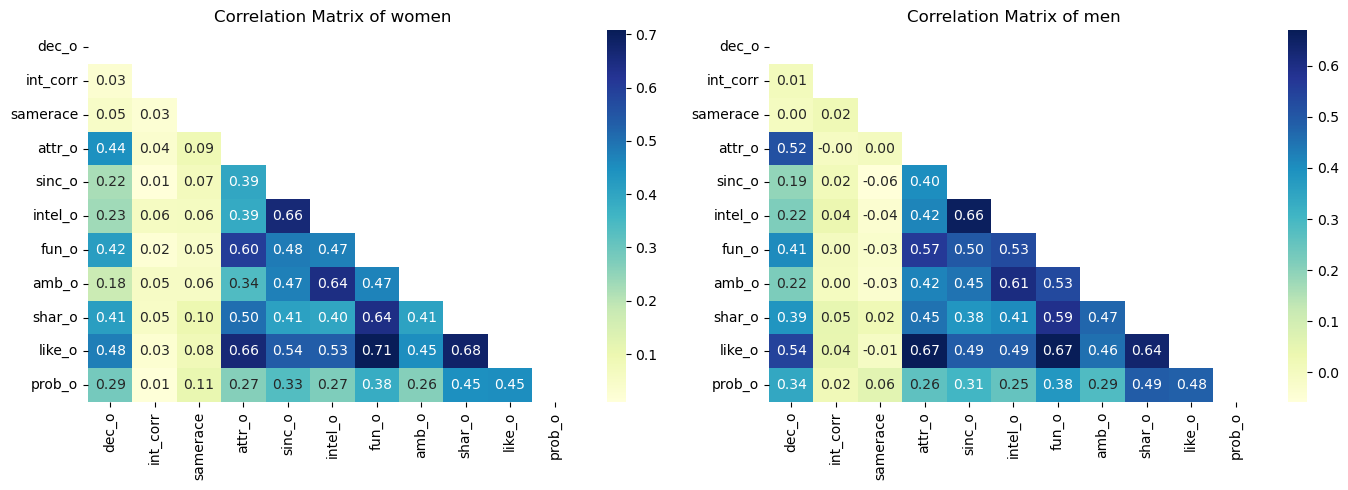

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
df['gender_decoded_o'] = df['gender'].apply(lambda x: np.abs(1-x)).map(gender_map)

# Iterate over unique genders
for idx, gender in enumerate(set(df['gender_decoded_o'])):
    # Compute the correlation matrix for the specific gender
    corr_matrix = df[df['gender_decoded_o'] == gender][df_corr.columns].corr()
    
    # Generate a mask for the lower triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", ax=axes[idx], mask=mask)
    axes[idx].set_title(f'Correlation Matrix of {gender}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Insights from the correlation matrices by gender: 
- Having shared interest and having same race seem to be equally unimportant in participants' final decision about their date partners.

#### Men may not have been completely honest about the importance of attractiveness to them
- Men had assigned in average the lowest score to the attractiveness among the six attributes, yet, in reality it showed the strongest correlation with their decision to meet again among those six attributes. The correlation coefficient assigned by men to attractiveness is even higher than that of women. So maybe men were not very as honest as women their preferences before the event night ?
- For women the most correlated attribute was also attractiveness, as they had reported also in their average preference scores.

#### Shared race indeed achieved a higher coefficient among women than men.
- Although it seems to have near zero impact in decision making for both genders, women still displayed a slight correlation between having shared racial background and their decisio while the coefficient was zero for men.



### 2.3 Did race really not matter?
Let's check if there will be any correlation between impact of race on decisions and previously reported impotance attributed to shared race factor.

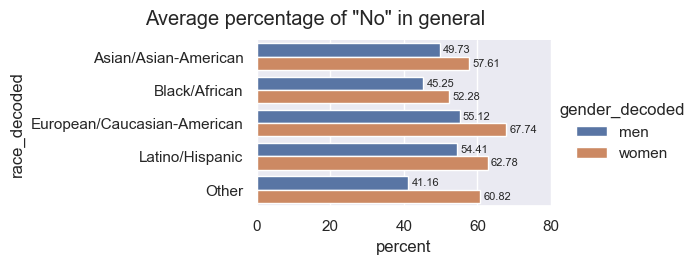

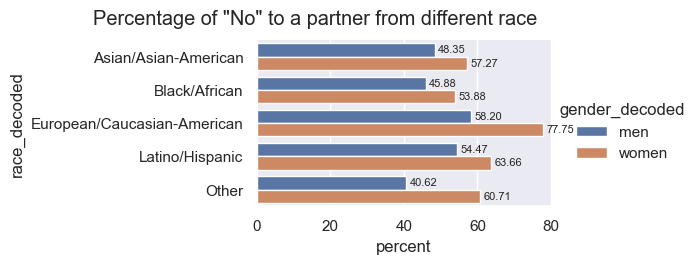

In [36]:
df['dec'] = df['dec'].astype('int64', errors='ignore')

                                  
df_all = df.groupby(['gender_decoded', 'race_decoded'])['dec'].value_counts(normalize=True) * 100
df_all = df_all.rename('percent').reset_index()
df_all = pd.DataFrame(df_all)

sns.set_theme()
fig = sns.catplot(kind='bar', data=df_all[df_all['dec']==0], x='percent', y='race_decoded', hue='gender_decoded',
             ci=None, height = 2.5, aspect=2.5)
for p in fig.ax.patches:
    value = f'{p.get_width():.2f}' 
    fig.ax.annotate(value,                     
                    (p.get_width() - 1, p.get_y() + p.get_height() / 2), 
                    xytext=(15, 0),               
                    textcoords='offset points',   
                    ha='center', va='center',     
                    fontsize=8)       
fig.fig.suptitle('Average percentage of "No" in general', y=1.05)
fig.set(xlim=(0, 80))     

df_n = df[df['samerace']==0].groupby(['gender_decoded', 'race_decoded'])['dec'].value_counts(normalize=True) * 100
df_n = df_n.rename('percent').reset_index()
df_n = pd.DataFrame(df_n)



fig = sns.catplot(kind='bar', data=df_n[df_n['dec']==0], x='percent', y='race_decoded', hue='gender_decoded',
             ci=None, height = 2.5, aspect=2.5)
for p in fig.ax.patches:
    value = f'{p.get_width():.2f}' 
    fig.ax.annotate(value,                     
                    (p.get_width() - 1, p.get_y() + p.get_height() / 2), 
                    xytext=(15, 0),               
                    textcoords='offset points',   
                    ha='center', va='center',     
                    fontsize=8)      
fig.fig.suptitle('Percentage of "No" to a partner from different race', y=1.05)
fig.set(xlim=(0, 80))
          
                                  


- In contrast to certain discrepancies between reported and perceived share interests, or reported and real importance of some attributes, here the results are much more in compliance with average self-reported preferences of each group.
- Race does not seem to increase the likelihood of saying no for the majority of participants except for European/Caucasian or Americans.
- Within this group likelihood to say no increase by 3 percentage points for men in the case of dating a partner from a different racial background, and by 10 percentage points for women.

### 2.4 Is there any dating fatigue? How did the order of the date affected the attribute rankings and decisions?
We may wanna know how being one of the earlier or later dates of someone will affect the way they evaluate their partner's attributes and judgments. Will they become harsher because there are more people to compare with? Or will they start with higher expectations and thus judge the earlier partners more strictly?

#### Attention : 
Order variable is described as "the number of date that night when met partner" (see word doc) therefore, not in terms of the partner's but in terms of the iid person's point of view. Therefore, this time we will use their ratings and decisions instead of partners [attr, dec] instead of [attr_o, dec_o].

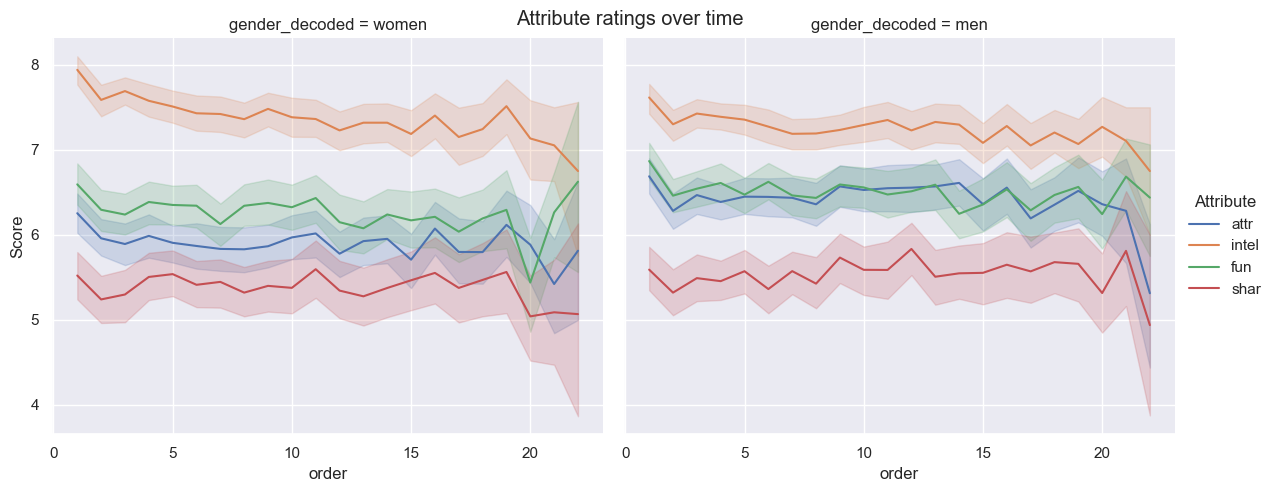

In [47]:
# Melt the dataframe to have preferences as a single column
rated_attributes = ['attr','intel', 'fun', 'shar'] 
melted_df = pd.melt(df[rated_attributes+['order','gender_decoded']], id_vars=['order','gender_decoded'],
                    value_vars=rated_attributes, var_name='Attribute', value_name='Score')

#plt.figure(figsize=(8, 3))
sns.relplot(data=melted_df, x="order", y="Score", hue="Attribute", kind='line', 
            col='gender_decoded', height = 5, aspect=1.2)

plt.suptitle('Attribute ratings over time')  # Set the main title for the entire plot


plt.show()

- There is a clear tendency to decline in the intelligence ratings given to the partner especially among the women.Here there might indeed be a comparison affect in play.
- The other attributes also fluctuates but not in a very significant manner.
- Let's see how these will impact the decisions

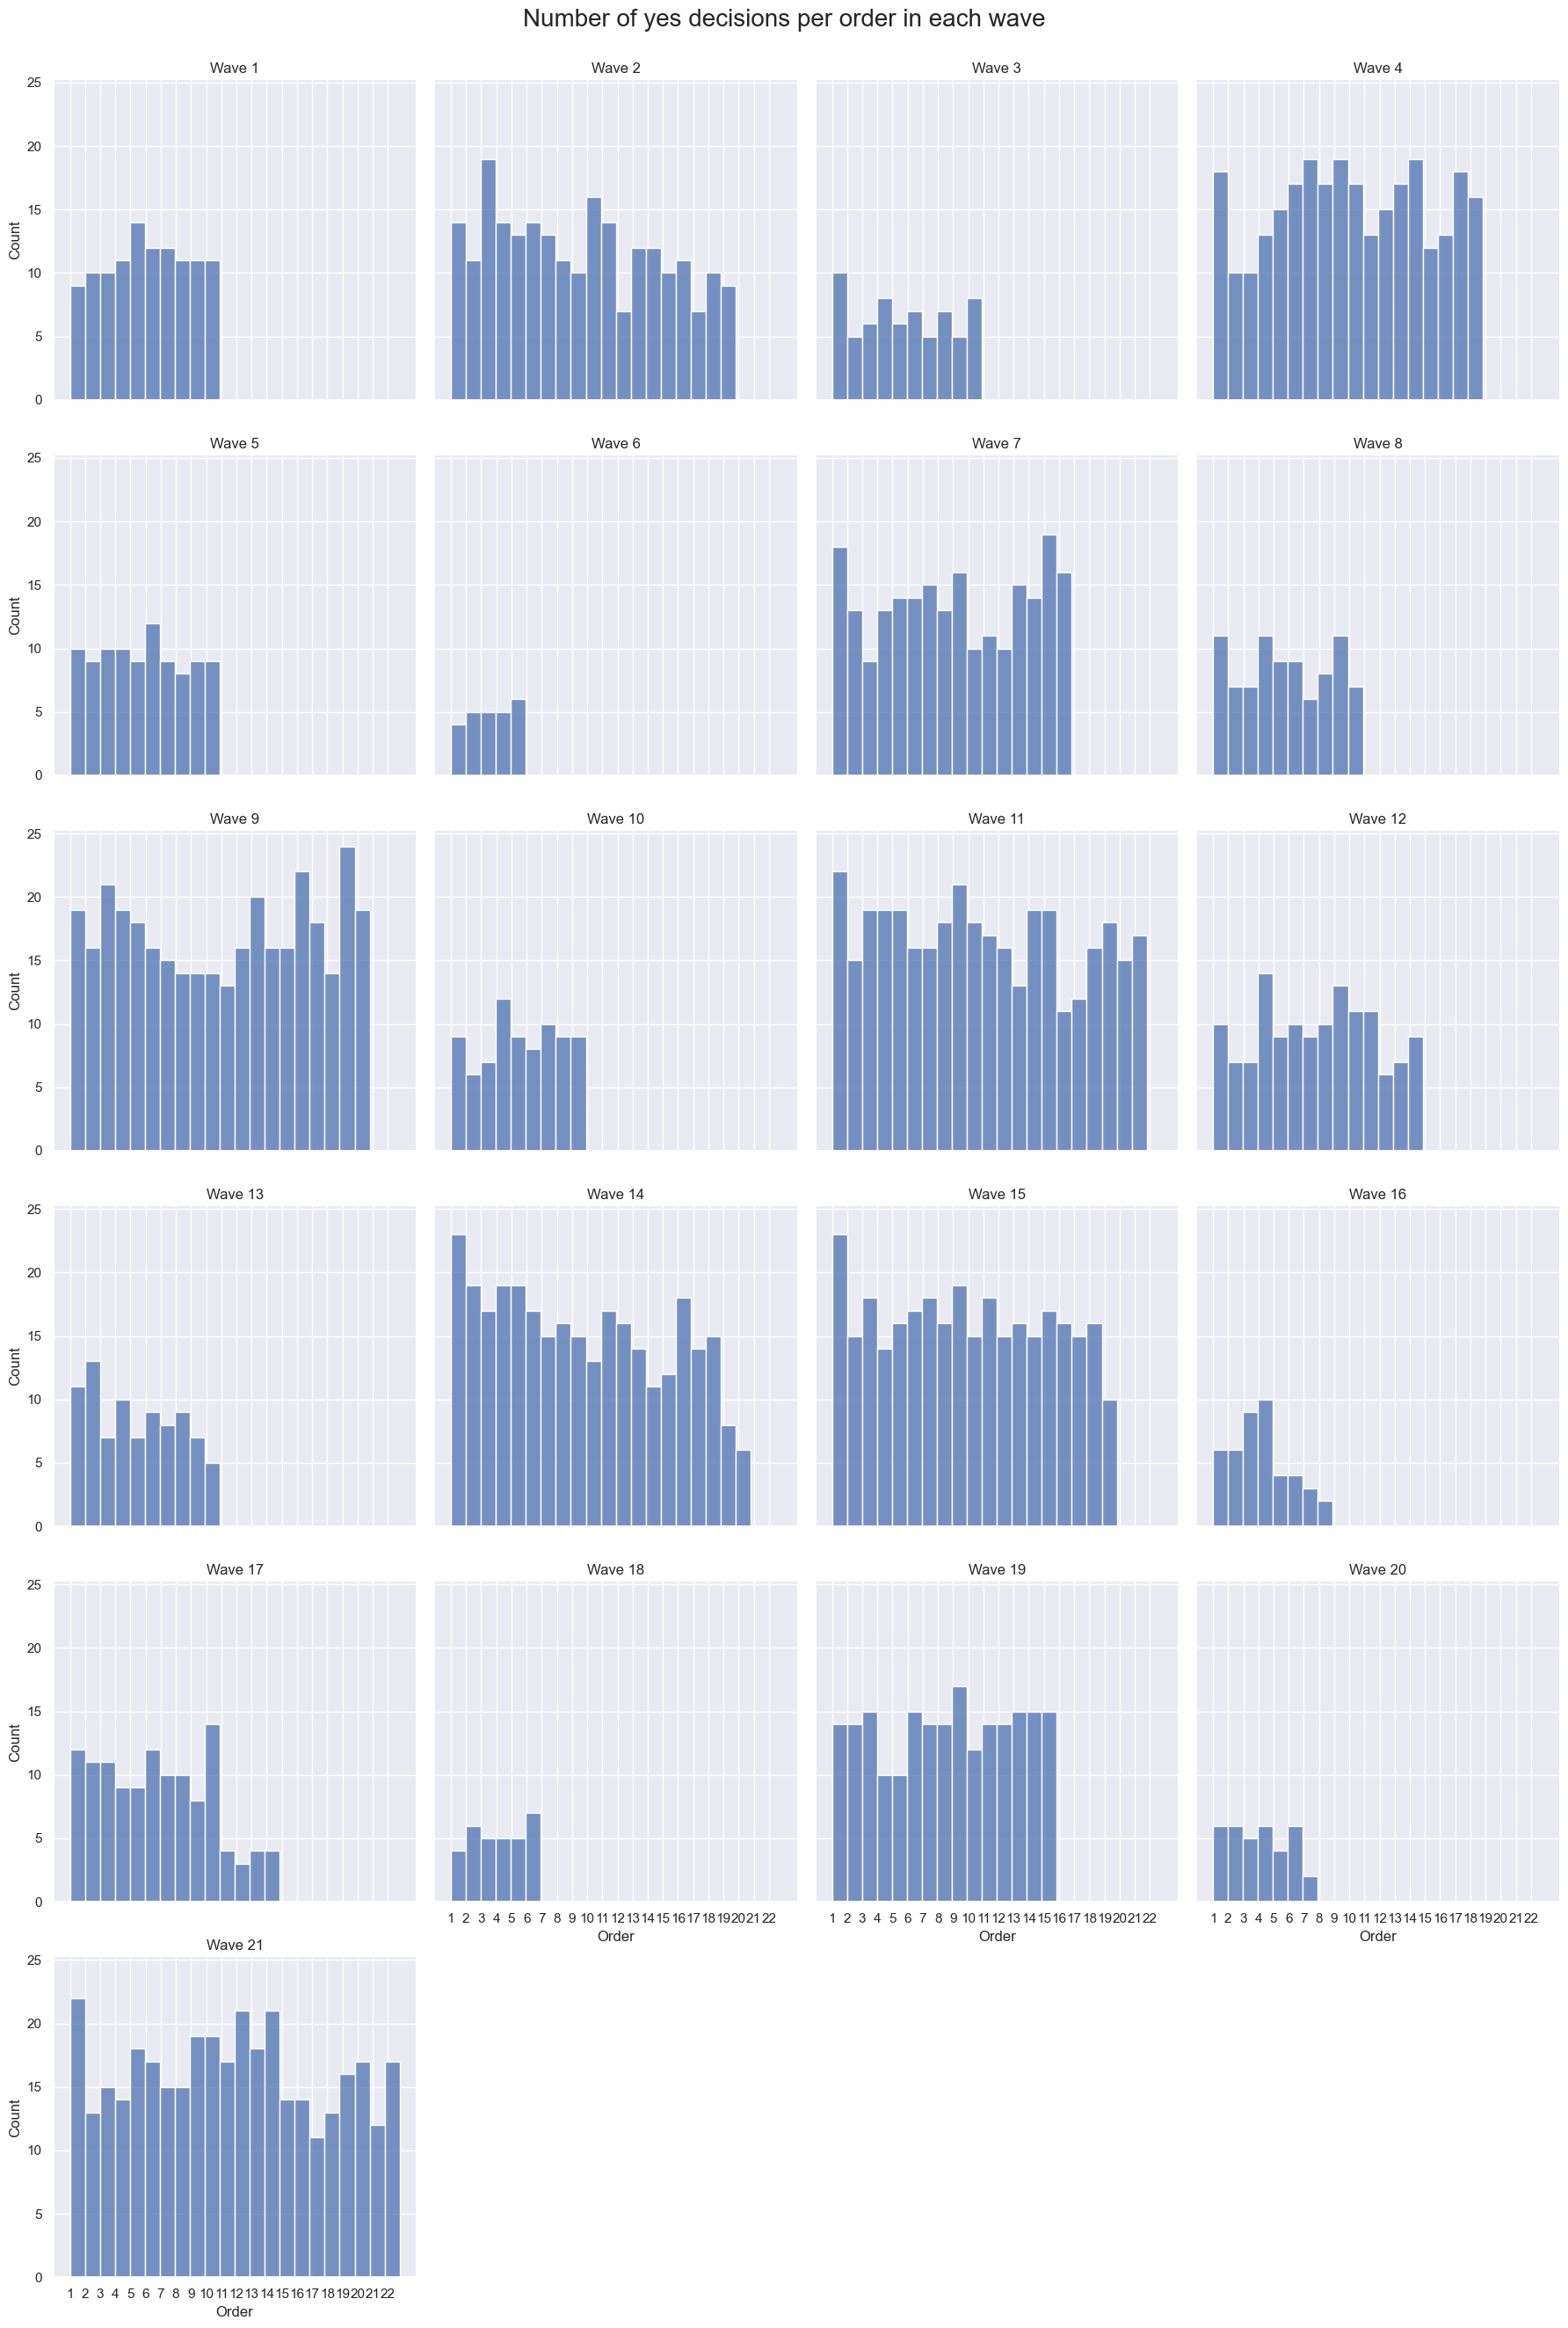

In [41]:
df['wave'] = df['wave'].astype(int)
order_list = df['order'].unique().astype(str)
order_list = np.sort(order_list)
# Create a FacetGrid for 'wave' variable
g = sns.FacetGrid(data = df[df['dec']==1], col='wave', col_wrap=4, height=4.5, 
                  #hue='gender_decoded'
                 )

# Map the histograms to the FacetGrid for 'order'
g.map(sns.histplot, 'order', binwidth=0.99)
plt.xticks(df['order'].unique())

# Adjust plot aesthetics
g.set_axis_labels("Order", "Count")
g.set_titles("Wave {col_name}")
g.fig.suptitle("Number of yes decisions per order in each wave", fontsize=20)

g.fig.subplots_adjust(top=0.95) 


# Show the plot
plt.show()


In [42]:
df['is_first_date'] = df['order'] == 1
df['is_last_date'] = df.groupby('iid')['round'].transform('count') == df['order']


In [45]:
df['dec'] = df['dec'].astype(str)

for col in ["is_first_date", "is_last_date"]:
    df_n = df.groupby(col)['dec'].value_counts(normalize=True)
    df_n = df_n * 100
    df_n = df_n.rename('percent').reset_index()

    # Creating bar plots using Plotly Express
    fig = px.bar(df_n, x=col, y='percent', color='dec', barmode='group',
                 title=f"Decision shares per order",
                 labels={col: col.capitalize(), 'percent': 'Percentage', 'dec': 'dec'},
                 height=400, width=400)

    fig.update_layout(yaxis=dict(range=[0, 100]))  # Setting y-axis range
    fig.add_shape(type="line", x0=-0.5, x1=1.5, y0=42, y1=42,
                  line=dict(color="green", width=3))

    fig.show()

The green line shows the general percentage of yes decisions in both figures.
- While both first and last position seem to be more advantages compared to the rest in terms of receiving a positive decision from the partner, first position is clearly far more advantageous with almost 50% of participants saying yes to their first partner.